## ANLP Assignment 2: Natural Language Generation Code
### Christopher Hamilton,  a1766121

In [1]:
import json
import os

import pandas as pd
import numpy as np

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            # Load each line of the JSON file as a dictionary
            data.append(json.loads(line))

    # Form a Pandas DataFrame from the dictionaries
    return pd.json_normalize(data)

# Load the training and test data
raw_train_df = read_json_to_df("hotel_reviews_train.json")
raw_test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
# Print out the initially loaded dataframes
raw_train_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“Horrible experience”,First of all we got there and they didn't have...,September 2012,80138,0,"September 19, 2012",140716137,False,1.0,2.0,...,1.0,Kh3RD,1.0,AB404BB664D653ECF79DE0E0867F6D34,"Las Vegas, Nevada",NaN,NaN,NaN,NaN,NaN
1,“Stay Away”,Found Racist graffiti in the room. Request to ...,June 2011,240151,1,"June 27, 2011",114807323,False,1.0,1.0,...,NaN,TheUglyPhotographer,4.0,BB116F87FE8F9AB356F63853BFD32FFE,"Oceanside, California",3.0,4.0,4.0,NaN,NaN
2,“Great location and service”,Close to Union Square - hotel is a bit of a ma...,October 2010,80793,0,"October 25, 2010",84805430,False,4.0,5.0,...,4.0,Moonstonemoclips,48.0,F3D0CF371B788300E73A1413B2DABB4B,Kirkland,31.0,27.0,32.0,NaN,NaN
3,“I will never go back here again!”,I had a bad vibe about this place from the mom...,June 2012,111418,1,"June 28, 2012",132971117,False,3.0,2.0,...,1.0,JoanellenJ,22.0,BC6BC07F81B768F78B6CE17A18762C11,New York,10.0,9.0,5.0,NaN,NaN
4,“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...",January 2012,671150,3,"February 4, 2012",124104157,False,NaN,NaN,...,NaN,Lynnworks,3.0,F7E9D044FA2554FD06A871289312E043,Providence,3.0,7.0,3.0,NaN,NaN


In [4]:
raw_test_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“I was SO surprised! I WILL return!”,My husband and I just celebrated our 25th wedd...,November 2011,1783324,1,"November 26, 2011",121063682,False,5.0,5.0,...,5.0,shooflyfarm,15.0,12.0,30.0,11.0,02C39D355EE31BFA82F2724523782A92,"Opelika, Alabama",NaN,NaN
1,“A Mother/Daughter vacation”,I could not leave a bad comment on any part of...,August 2011,88458,0,"August 10, 2011",116545869,False,5.0,5.0,...,NaN,bestmpm,NaN,NaN,1.0,NaN,8F37B44FE89FD626313A7CB4B381FE40,Chattanooga,NaN,NaN
2,“Good Choice for Pre-cruise”,I spent one night at this hotel prior to a cru...,November 2010,82868,0,"December 6, 2010",89196759,False,5.0,5.0,...,5.0,Conner2dood,20.0,39.0,26.0,24.0,5E57B2B21C69F07E617D67C748DF010A,Pennsylvania,NaN,NaN
3,“Unsung Hero”,"For the past year and a half, my daughter has ...",July 2011,98979,0,"July 28, 2011",115879719,False,5.0,5.0,...,NaN,LeviK,2.0,NaN,2.0,NaN,D7E5C22B3A877DEA1434B18E797FEE19,,NaN,NaN
4,"“Great Value for a King, Queen, and Princesses.”","Great Value for a King, Queen, and Princesses....",March 2007,112273,8,"March 21, 2007",7198417,False,5.0,5.0,...,5.0,thomrho,13.0,25.0,27.0,4.0,EEE6C615C8EBCA4AFD2774810E590274,"albuquerque, nm",5.0,5.0


In [5]:
ratings_columns = [col for col in raw_train_df.columns if col.startswith("ratings.")]

# Select the title, text and overall rating columns to make a new dataframe
train_df = raw_train_df[["title", "text", "id"] + ratings_columns]
test_df = raw_test_df[["title", "text", "id"] + ratings_columns]

# Check the value counts for the ratings
for dataset in [train_df, test_df]:
    for column in ratings_columns:
        print(dataset[column].value_counts())
        print()

    print()

ratings.service
5.0    11130
4.0     5289
3.0     2677
1.0     1341
2.0     1113
Name: count, dtype: int64

ratings.cleanliness
5.0    11814
4.0     5560
3.0     2373
2.0      901
1.0      897
Name: count, dtype: int64

ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64

ratings.value
5.0    8828
4.0    6312
3.0    3603
2.0    1420
1.0    1384
Name: count, dtype: int64

ratings.location
5.0    11743
4.0     4523
3.0     1875
2.0      504
1.0      338
Name: count, dtype: int64

ratings.sleep_quality
5.0    7167
4.0    3898
3.0    1811
1.0     671
2.0     638
Name: count, dtype: int64

ratings.rooms
5.0    8116
4.0    6142
3.0    3330
2.0    1316
1.0    1096
Name: count, dtype: int64

ratings.check_in_front_desk
5.0    1323
4.0     694
3.0     486
2.0     221
1.0     185
Name: count, dtype: int64

ratings.business_service_(e_g_internet_access)
5.0    643
3.0    503
4.0    491
2.0    164
1.0    158
Name: count, dtype: int64


ratings.serv

In [6]:
# Find indices of rows where the rating is 0
zero_rating_indices = test_df[test_df['ratings.overall'] == 0].index
for index in zero_rating_indices:
    # Print the text corresponding to the zero rating
    print(test_df['text'][index])

Best location. Right where Pier 39 is. Lots of things to do around the area, restaurants and sight seeing. Staff are friendly. Great service. Will come back again :)


In [7]:
# Based on the above text, it is unlikely the reviewer meant to give a low rating
# Instead, we will remvoe the 0 from the dataset
test_df = test_df.drop(zero_rating_indices)

In [8]:
# Check the value counts for the ratings after the 0 rating has been removed
print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
Name: count, dtype: int64


Python's lambda functions can be used to remove the special characters from the dataset. Pandas DataFrames columns include an `apply` method that can take in a lambda function to apply to each cell in the column. By including a lambda function that will only include characters which are alphanumeric or spaces, the special characters can be removed from the dataset (Saturn Cloud 2024).

At the same time, we can apply the `lower()` function on each character to convert all the text to lowercase. This can be seen by viewing the first few rows with the `head()` function on the DataFrames.

In [9]:
# Remove remove non-alphanumeric characters from the title and text columns
train_df.loc[:, 'title'] = train_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
train_df.loc[:, 'text'] = train_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

test_df.loc[:, 'title'] = test_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

In [10]:
train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,horrible experience,first of all we got there and they didnt have ...,140716137,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN,NaN
1,stay away,found racist graffiti in the room request to c...,114807323,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
2,great location and service,close to union square hotel is a bit of a maz...,84805430,4.0,5.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN
3,i will never go back here again,i had a bad vibe about this place from the mom...,132971117,3.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,NaN
4,ripped off our visa card after departure,after we received our final bill and left the ...,124104157,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,i was so surprised i will return,my husband and i just celebrated our 25th wedd...,121063682,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,a motherdaughter vacation,i could not leave a bad comment on any part of...,116545869,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
2,good choice for precruise,i spent one night at this hotel prior to a cru...,89196759,5.0,5.0,4.0,5.0,4.0,5.0,5.0,NaN,NaN
3,unsung hero,for the past year and a half my daughter has b...,115879719,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
4,great value for a king queen and princesses,great value for a king queen and princesses we...,7198417,5.0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,5.0


The provided code for the `language_filter.py` file includes an example of using the `langdetect` Python package to filter for only English text. Rather than applying the filter for only English reviews when reading the file, we can apply the filter on the loaded DataFrames using a similar method to above. By using the Pandas `apply` method on the text and title columns, the returned DataFrame will only include rows where both the title and text are in English as determined by the `langdetect` package.

In [12]:
from langdetect import detect as detect_language

def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    # Filter the DataFrame for reviews where both title and text are in English
    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

Since the language detecting process takes some time over the whole dataset, to save time during development, the filtered DataFrames can be saved and loaded from CSV. Since these DataFrames will not change, and all preprocessing steps are the same, running the language filter each time is not necessary. I have written some quick checks to see if the files have already been saved, and if they have load them, otherwise run the language check code and save the files for later.

In [13]:
# Save the English reviews to a CSV file to save time filtering when running again (NumFOCUS, Inc. 2024)
if os.path.exists("english_hotel_reviews_train.csv"):
    train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    train_df = filter_english_reviews(train_df)
    train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    test_df = filter_english_reviews(test_df)
    test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [14]:
print(raw_train_df.info())
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           24000 non-null  object 
 1   text                                            24000 non-null  object 
 2   date_stayed                                     23050 non-null  object 
 3   offering_id                                     24000 non-null  int64  
 4   num_helpful_votes                               24000 non-null  int64  
 5   date                                            24000 non-null  object 
 6   id                                              24000 non-null  int64  
 7   via_mobile                                      24000 non-null  bool   
 8   ratings.service                                 21550 non-null  float64
 9   ratings.cleanliness                    

In [15]:
print(raw_test_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           6000 non-null   object 
 1   text                                            6000 non-null   object 
 2   date_stayed                                     5756 non-null   object 
 3   offering_id                                     6000 non-null   int64  
 4   num_helpful_votes                               6000 non-null   int64  
 5   date                                            6000 non-null   object 
 6   id                                              6000 non-null   int64  
 7   via_mobile                                      6000 non-null   bool   
 8   ratings.service                                 5351 non-null   float64
 9   ratings.cleanliness                      

### 2. Exploratory Data Analysis (EDA)

In [16]:
print(ratings_columns)

['ratings.service', 'ratings.cleanliness', 'ratings.overall', 'ratings.value', 'ratings.location', 'ratings.sleep_quality', 'ratings.rooms', 'ratings.check_in_front_desk', 'ratings.business_service_(e_g_internet_access)']


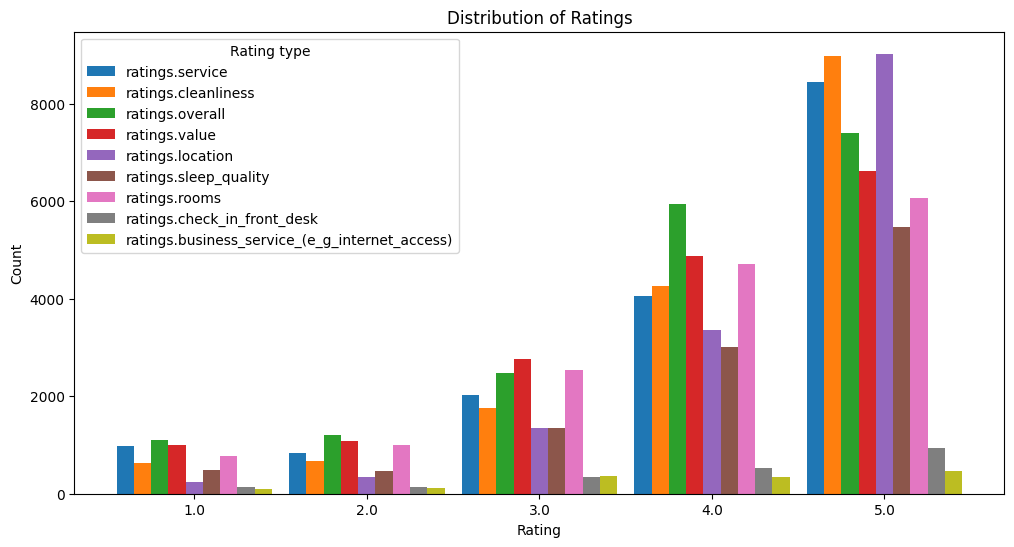

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

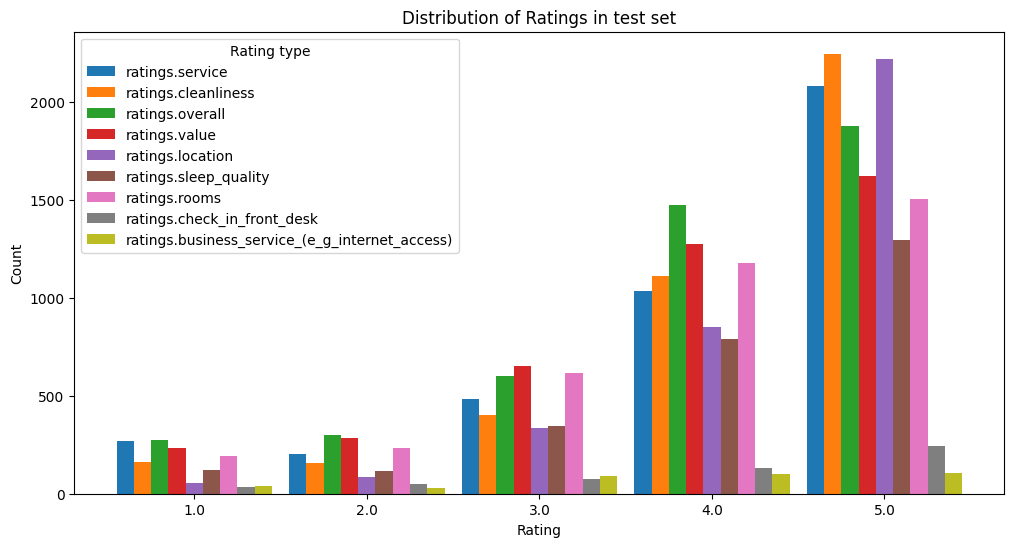

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: test_df[col].replace(0, None).value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings in test set")
plt.legend(title="Rating type")
plt.show()

In [19]:
# Find how many reviews contain all the ratings
all_ratings = train_df.dropna(axis=0)
all_ratings

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
1812,thank you yotel,i cant say enough about this hotel being irish...,127001943,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,3.0
5402,great place,the hotel is located in a refurbished bank the...,67581781,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0


In [20]:
# Find reviews with no text
no_text_reviews = train_df[train_df['text'].str.len() == 0]
no_text_reviews

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)


In [21]:
# Find reviews with no text
no_text_reviews = test_df[test_df['text'].str.len() == 0]
no_text_reviews

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)


In [22]:
# Balance the training data by undersampling
def balance_data_undersample(df):
    # Find the minimum overall rating count
    min_count = df['ratings.overall'].value_counts().min()
    balanced_df = pd.DataFrame()

    for rating in range(1, 5):
        # Get a dataframe with all the data for this rating
        rating_df = df[df['ratings.overall'] == rating]
        # Add a sample of the smallest size for this rating
        balanced_df = pd.concat([balanced_df, rating_df.sample(min_count, replace=False)])

    return balanced_df

balanced_train_df = balance_data_undersample(train_df)

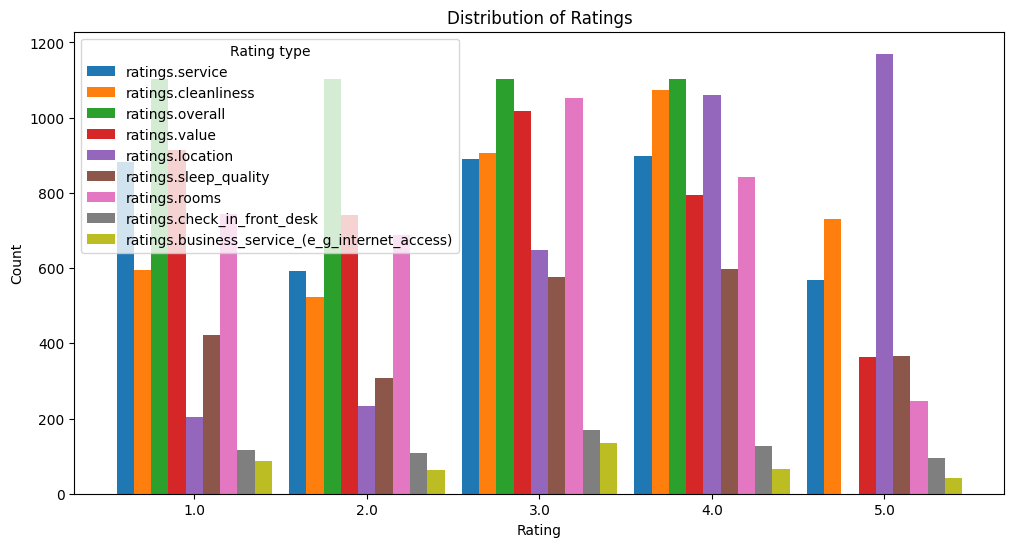

In [23]:
# Plot the distribution of the dataset after balancing
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

rating_counts = pd.DataFrame({
    col: balanced_train_df[col].value_counts().sort_index() for col in ratings_columns
})

bar_width = 0.15
group_spacing = 1.5
indices = np.arange(len(rating_counts)) * group_spacing

for i, column in enumerate(rating_counts.columns):
    plt.bar(indices + i * bar_width, rating_counts[column], width=bar_width, label=column)

plt.xticks(indices + bar_width * (len(ratings_columns) - 1) / 2, rating_counts.index)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.legend(title="Rating type")
plt.show()

In [24]:
balanced_train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
8750,thrown out by the maid,everything went well right up to the morning o...,16803395,1.0,5.0,1.0,4.0,5.0,NaN,5.0,5.0,NaN
2941,would not recommend,the staff was very friendly and the location i...,46740700,3.0,3.0,1.0,1.0,4.0,NaN,1.0,NaN,NaN
14267,dont be fooled by the attractive lobby the fl...,floor 20 older tower one typically associates ...,8718245,3.0,3.0,1.0,1.0,5.0,NaN,1.0,3.0,1.0
2228,dont go for the health club,the hotel itselft was nice enough a little pri...,10090390,3.0,3.0,1.0,2.0,4.0,NaN,3.0,4.0,2.0
13325,do not stay here,this hotel is horrific due to overbooking the ...,121161251,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for column in ratings_columns:
    print(f"NA in {column}: {balanced_train_df[column].isna().sum()}")

NA in ratings.service: 582
NA in ratings.cleanliness: 585
NA in ratings.overall: 0
NA in ratings.value: 579
NA in ratings.location: 1099
NA in ratings.sleep_quality: 2142
NA in ratings.rooms: 838
NA in ratings.check_in_front_desk: 3796
NA in ratings.business_service_(e_g_internet_access): 4020


In [26]:
# Replae the NA review numbers with 0 to indicate they are not used in the review
balanced_train_df = balanced_train_df.fillna(0)
test_df = test_df.fillna(0)

In [27]:
balanced_train_df.head()

,title,text,id,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
8750,thrown out by the maid,everything went well right up to the morning o...,16803395,1.0,5.0,1.0,4.0,5.0,0.0,5.0,5.0,0.0
2941,would not recommend,the staff was very friendly and the location i...,46740700,3.0,3.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0
14267,dont be fooled by the attractive lobby the fl...,floor 20 older tower one typically associates ...,8718245,3.0,3.0,1.0,1.0,5.0,0.0,1.0,3.0,1.0
2228,dont go for the health club,the hotel itselft was nice enough a little pri...,10090390,3.0,3.0,1.0,2.0,4.0,0.0,3.0,4.0,2.0
13325,do not stay here,this hotel is horrific due to overbooking the ...,121161251,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
inputs = balanced_train_df[ratings_columns]
outputs = balanced_train_df['text']

inputs_test = test_df[ratings_columns]
outputs_test = test_df['text']

In [29]:
inputs.head()

,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
8750,1.0,5.0,1.0,4.0,5.0,0.0,5.0,5.0,0.0
2941,3.0,3.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0
14267,3.0,3.0,1.0,1.0,5.0,0.0,1.0,3.0,1.0
2228,3.0,3.0,1.0,2.0,4.0,0.0,3.0,4.0,2.0
13325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
outputs.head()

8750     everything went well right up to the morning o...
2941     the staff was very friendly and the location i...
14267    floor 20 older tower one typically associates ...
2228     the hotel itselft was nice enough a little pri...
13325    this hotel is horrific due to overbooking the ...
Name: text, dtype: object

In [31]:
from math import ceil
average_sequence_length = int(ceil(balanced_train_df['text'].apply(lambda text: text.split(' ')).apply(len).mean()))

## Model

In [32]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=(6.5 * 1024))])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

2025-05-31 14:05:12.612228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 14:05:12.621681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748666112.632280   35781 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748666112.635730   35781 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748666112.644842   35781 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1748666114.071612   35781 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6656 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [33]:
def format_input(rating) -> str:
    input = "Generate a hotel review based on the following ratings:\n"
    service = rating.iloc[0]
    cleanliness = rating.iloc[1]
    overall = rating.iloc[2]
    value = rating.iloc[3]
    location = rating.iloc[4]
    sleep_quality = rating.iloc[5]
    rooms = rating.iloc[6]
    check_in_front_desk = rating.iloc[7]
    business_service = rating.iloc[8]

    if service:
      input += f"- service: {service}\n"
    if cleanliness:
      input += f"- cleanliness: {cleanliness}\n"
    if overall:
      input += f"- overall: {overall}\n"
    if value:
      input += f"- value: {value}\n"
    if location:
      input += f"- location: {location}\n"
    if sleep_quality:
      input += f"- sleep quality: {sleep_quality}\n"
    if rooms:
      input += f"- rooms: {rooms}\n"
    if check_in_front_desk:
      input += f"- check in: {check_in_front_desk}\n"
    if business_service:
      input += f"- business service: {business_service}\n"

    return input

In [34]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, BartForConditionalGeneration
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import Dataset

from math import ceil

dataset = Dataset.from_dict({"ratings": inputs.apply(format_input, axis=1).to_list(), "review_text": outputs.to_list()})
test_dataset = Dataset.from_dict({"ratings": inputs_test.apply(format_input, axis=1).to_list(), "review_text": outputs_test.to_list()})

dataset = dataset.shuffle()

# Preprocessing function for dataset
def preprocess(tokeniser, examples):
    model_inputs = tokeniser(examples["ratings"], truncation=True, padding="max_length", max_length=30)
    labels = tokeniser(examples["review_text"], truncation=True, padding="max_length", max_length=ceil(average_sequence_length))
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [35]:
def generate_review(ratings_str, model, tokeniser):
    device = model.device
    inputs = tokeniser(ratings_str, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=average_sequence_length)
    return tokeniser.decode(output[0], skip_special_tokens=True)

In [36]:
from evaluate import load

from rouge import Rouge

rouge = Rouge()

generated_reviews = []
reference_reviews = []

def evaluate_model(model, tokeniser):
    from statistics import mean

    for example in test_dataset.select(range(100)):  # TODO: Select 100 rows for testing
        generated_review = generate_review(example["ratings"], model, tokeniser)

        if len(generated_review) == 0:
            continue
    
        generated_reviews.append(generated_review)
        reference_reviews.append(example["review_text"])
    
    # Evaluate the summaries using the ROUGE metric
    rouge_scores = rouge.get_scores(generated_reviews, reference_reviews)
    rouge_1_ps = []
    rouge_1_rs = []
    rouge_1_fs = []
    
    rouge_2_ps = []
    rouge_2_rs = []
    rouge_2_fs = []
    
    rouge_l_ps = []
    rouge_l_rs = []
    rouge_l_fs = []
    for score in rouge_scores:
        rouge_1_ps.append(score['rouge-1']['p'])
        rouge_1_rs.append(score['rouge-1']['r'])
        rouge_1_fs.append(score['rouge-1']['f'])
    
        rouge_2_ps.append(score['rouge-2']['p'])
        rouge_2_rs.append(score['rouge-2']['r'])
        rouge_2_fs.append(score['rouge-2']['f'])
    
        rouge_l_ps.append(score['rouge-l']['p'])
        rouge_l_rs.append(score['rouge-l']['r'])
        rouge_l_fs.append(score['rouge-l']['f'])
    
    print(f"ROUGE-1 Precision: {mean(rouge_1_ps)}")
    print(f"ROUGE-1 Recall: {mean(rouge_1_rs)}")
    print(f"ROUGE-1 F1: {mean(rouge_1_fs)}")
    
    print(f"ROUGE-2 Precision: {mean(rouge_2_ps)}")
    print(f"ROUGE-2 Recall: {mean(rouge_2_rs)}")
    print(f"ROUGE-2 F1: {mean(rouge_2_fs)}")
    
    print(f"ROUGE-L Precision: {mean(rouge_l_ps)}")
    print(f"ROUGE-L Recall: {mean(rouge_l_rs)}")
    print(f"ROUGE-L F1: {mean(rouge_l_fs)}")
    
    from statistics import mean
    bertscore = load("bertscore")
    results = bertscore.compute(predictions=generated_reviews, references=reference_reviews, lang="en")
    
    precision = mean(results['precision'])
    recall = mean(results['recall'])
    f1_score = (2 * precision * recall) / (precision + recall)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1_score:.4f}")

### Testing models without Fine Tuning

In [37]:
models = [
    {'name': 't5', 'model': T5ForConditionalGeneration.from_pretrained('t5-small'), 'tokeniser': AutoTokenizer.from_pretrained('t5-small')},
    {'name': 'bart', 'model': BartForConditionalGeneration.from_pretrained('facebook/bart-base'), 'tokeniser': AutoTokenizer.from_pretrained('facebook/bart-base')},
]

In [38]:
models_without_fine_tuning = {}

In [39]:
for model_definition in models:
    print(f"Model is {model_definition['name']}")
    
    model = model_definition['model']
    tokeniser = model_definition['tokeniser']

    models_without_fine_tuning[model_definition['name']] = {'model': model, 'tokeniser': tokeniser}

    evaluate_model(model, tokeniser)

Model is t5
ROUGE-1 Precision: 0.1807383866040482
ROUGE-1 Recall: 0.0429962312982746
ROUGE-1 F1: 0.06666012359219525
ROUGE-2 Precision: 0.017278298790084832
ROUGE-2 Recall: 0.0030032186362544543
ROUGE-2 F1: 0.004940373865393166
ROUGE-L Precision: 0.15905080111554737
ROUGE-L Recall: 0.03687658668442203
ROUGE-L F1: 0.05751491247232743


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.7924
Recall:    0.7871
F1 Score:  0.7898
Model is bart
ROUGE-1 Precision: 0.17451045943436283
ROUGE-1 Recall: 0.04821183396834089
ROUGE-1 F1: 0.0714588098675617
ROUGE-2 Precision: 0.014849821603585518
ROUGE-2 Recall: 0.0025471822440221686
ROUGE-2 F1: 0.004168134850696407
ROUGE-L Precision: 0.15513613796840714
ROUGE-L Recall: 0.041852472609154506
ROUGE-L F1: 0.062428725400612964


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.7836
Recall:    0.7869
F1 Score:  0.7852


#### Testing generated reviews

In [40]:
def generate_review_from_id(review_id):
    ratings_from_review = test_df[test_df['id'] == review_id].iloc[0][ratings_columns]
    model_input = format_input(ratings_from_review)
    print(model_input)
    return generate_review(model_input, models_without_fine_tuning['t5']['model'], models_without_fine_tuning['t5']['tokeniser'])

In [41]:
review_id = 121063682
generated_review = generate_review_from_id(review_id)
print(generated_review)

Generate a hotel review based on the following ratings:
- service: 5.0
- cleanliness: 5.0
- overall: 5.0
- value: 5.0
- location: 5.0
- sleep quality: 5.0
- rooms: 5.0

a review of the hotel based on the following ratings: - service: 5.0 - cleanliness: 5.0 - overall: 5.0 - value: 5.0 - location: 5.0 - sleep quality: 5.0 - rooms: 5.0


### Fine-Tuning Models

In [42]:
models = [
    {'name': 't5', 'model': T5ForConditionalGeneration.from_pretrained('t5-small'), 'tokeniser': AutoTokenizer.from_pretrained('t5-small')},
    {'name': 'bart', 'model': BartForConditionalGeneration.from_pretrained('facebook/bart-base'), 'tokeniser': AutoTokenizer.from_pretrained('facebook/bart-base')},
]

In [43]:
trained_models = {}

In [44]:
for model_definition in models:
    print(f"Model is {model_definition['name']}")
    
    model = model_definition['model']
    tokeniser = model_definition['tokeniser']

    split = dataset.train_test_split(test_size=0.2)
    train_dataset = split['train']
    validation_dataset = split['test']

    tokenised_train = train_dataset.map(lambda batch: preprocess(tokeniser, batch), batched=True)
    tokenised_val = validation_dataset.map(lambda batch: preprocess(tokeniser, batch), batched=True)
    training_args = TrainingArguments(
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=20,
        logging_strategy="epoch",
        eval_strategy="epoch",
    )
    
    trainer = Trainer(model=model, args=training_args, train_dataset=tokenised_train, eval_dataset=tokenised_val)
    trainer.train()

    trained_models[model_definition['name']] = {'model': model, 'tokeniser': tokeniser}

Model is t5


Map:   0%|          | 0/3529 [00:00<?, ? examples/s]

Map:   0%|          | 0/883 [00:00<?, ? examples/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,3.707100,3.161179
2,3.339500,3.110372
3,3.289700,3.080986
4,3.255500,3.058017
5,3.228400,3.041550
6,3.202800,3.027382
7,3.189800,3.016970
8,3.170100,3.009084
9,3.155300,3.002359
10,3.151500,2.994878


Model is bart


Map:   0%|          | 0/3529 [00:00<?, ? examples/s]

Map:   0%|          | 0/883 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,3.444700,2.855983
2,2.896600,2.793954
3,2.760200,2.785629
4,2.663200,2.772527
5,2.577200,2.779091
6,2.498400,2.774992
7,2.435600,2.790731
8,2.369000,2.803780
9,2.316800,2.818604
10,2.262200,2.839759


/home/dev/repos/COMP-SCI-7417-Applied-Natural-Language-Processing/.venv/lib/python3.12/site-packages/transformers/modeling_utils.py:3465: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


In [45]:
for model in trained_models:
    print(f"Evaluating {model}")
    evaluate_model(trained_models[model]['model'], trained_models[model]['tokeniser'])

Evaluating t5
ROUGE-1 Precision: 0.28527657896084424
ROUGE-1 Recall: 0.0766738964042849
ROUGE-1 F1: 0.11519387690818592
ROUGE-2 Precision: 0.04784313456521448
ROUGE-2 Recall: 0.011765836432830553
ROUGE-2 F1: 0.01768198439935466
ROUGE-L Precision: 0.2235988175268881
ROUGE-L Recall: 0.0607855308125475
ROUGE-L F1: 0.09097705137301168


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.7831
Recall:    0.7939
F1 Score:  0.7885
Evaluating bart
ROUGE-1 Precision: 0.31566687845346103
ROUGE-1 Recall: 0.12044947172006609
ROUGE-1 F1: 0.15924151562210231
ROUGE-2 Precision: 0.058882782739532985
ROUGE-2 Recall: 0.023666312407491633
ROUGE-2 F1: 0.029736585465031082
ROUGE-L Precision: 0.2263513311988114
ROUGE-L Recall: 0.08199434975326282
ROUGE-L F1: 0.11022289451981741


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8013
Recall:    0.8022
F1 Score:  0.8018


### Generating Review for Review ID

In [46]:
def generate_review_from_id(review_id):
    ratings_from_review = test_df[test_df['id'] == review_id].iloc[0][ratings_columns]
    model_input = format_input(ratings_from_review)
    print(model_input)
    return generate_review(model_input, trained_models['bart']['model'], trained_models['bart']['tokeniser'])

In [47]:
review_id = 121063682
generated_review = generate_review_from_id(review_id)
print(generated_review)

Generate a hotel review based on the following ratings:
- service: 5.0
- cleanliness: 5.0
- overall: 5.0
- value: 5.0
- location: 5.0
- sleep quality: 5.0
- rooms: 5.0

we stayed at this hotel for one night in early november the staff were very friendly and helpful and the room was very clean the bed was very comfortable and the bathroom was very nice the only thing i didnt like about this hotel is the location it is right in the middle of times square and there is a subway stop right across the street which is great for getting around the city the rooms were very clean and the staff was very helpful and friendly the location is great if you are looking for a cheap place to stay in nyc this is the place for you


In [49]:
test_review = """Generate a hotel review based on the following ratings:
- check in: 1
- business service: 1
"""
generate_review(test_review, trained_models['t5']['model'], trained_models['t5']['tokeniser'])

'i stayed at the san francisco hotel for a week and i was very impressed with the location of the hotel and the staff were very helpful and helpful the hotel is a great location for a business trip and the san francisco airport is a great location for a business trip the hotel is a great location for a business trip and the san francisco airport is a great location for a business trip the hotel is a short walk to the san francisco airport and the airport and the san francisco airport i was a little disappointed with the hotel and the hotel and the hotel is a bit of a bit of a san francisco and the san francisco airport and the san francisco airport i was able'